In [84]:
import numpy as np 
from random import randint, random
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

Example data:
- An experimental drug was tested on idividuals from ages 13 to 100 in a clinical trial
- The trial had 2100 participants. Half were under 65
- Around 95% of participants over 65 
experienced side effects
- Around 95% of participants under 65 experienced no side effects

In [48]:
def create_data(sample_size=2100, age_split=0.5, age_range_1=(13, 64), age_range_2=(65, 100), side_effects_1=0.95, side_effects_2=0.05, scaler= MinMaxScaler(feature_range=(0,1))):
    labels = np.zeros((sample_size, 1))
    samples = np.zeros((sample_size, 1))
    
    age_size_1 = int(sample_size * age_split)
    age_size_2 = sample_size - age_size_1
    for i in range(age_size_1):
        samples[i, :] = randint(*age_range_1)

        labels[i, :] = (random() <= side_effects_1)
    for j in range(age_size_1, age_size_2):
        samples[j, :] = randint(*age_range_2)

        labels[j, :] = (random() <= side_effects_2)

    samples, labels = shuffle(samples, labels)
    scaled_samples = scaler.fit_transform(samples)
    return scaled_samples, labels

    

    

In [49]:
sample_size = 2100
over_65_side_effects = 0.95
under_65_side_effects = 0.05


In [50]:
scaled_train_samples, train_labels = create_data()

## Building the model
Two hidden layers: The first with 16 nodes and he second with 32

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [51]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Compile the model
- Optimizer: Adam
    - Learning rate: 0.0001
- Loss function: Saprse categorical crossentropy

In [53]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [54]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6427 - accuracy: 0.9603 - val_loss: 0.6300 - val_accuracy: 0.9571 - 973ms/epoch - 5ms/step
Epoch 2/30
189/189 - 1s - loss: 0.6042 - accuracy: 0.9661 - val_loss: 0.5927 - val_accuracy: 0.9571 - 572ms/epoch - 3ms/step
Epoch 3/30
189/189 - 1s - loss: 0.5629 - accuracy: 0.9661 - val_loss: 0.5517 - val_accuracy: 0.9571 - 648ms/epoch - 3ms/step
Epoch 4/30
189/189 - 1s - loss: 0.5189 - accuracy: 0.9661 - val_loss: 0.5093 - val_accuracy: 0.9571 - 782ms/epoch - 4ms/step
Epoch 5/30
189/189 - 1s - loss: 0.4744 - accuracy: 0.9661 - val_loss: 0.4661 - val_accuracy: 0.9571 - 796ms/epoch - 4ms/step
Epoch 6/30
189/189 - 0s - loss: 0.4318 - accuracy: 0.9661 - val_loss: 0.4259 - val_accuracy: 0.9571 - 475ms/epoch - 3ms/step
Epoch 7/30
189/189 - 1s - loss: 0.3934 - accuracy: 0.9661 - val_loss: 0.3897 - val_accuracy: 0.9571 - 773ms/epoch - 4ms/step
Epoch 8/30
189/189 - 1s - loss: 0.3596 - accuracy: 0.9661 - val_loss: 0.3579 - val_accuracy: 0.9571 - 822ms/epoch - 4ms/step


## Test on new data

In [109]:
test_samples, test_labels = create_data(sample_size=800)

In [110]:
predictions = model.predict(test_samples, batch_size=10)
rounded_predictions = np.argmax(predictions, axis=1)

80/80 [==============================] - 0s 1ms/step


In [111]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [112]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [113]:
def plot_confusion_matrix(cm,classes,
                        normalize=False,
                        title="Confusion matrix",
                        cmap=plt.cm.Blues
                        ):
    """This function plots a confusion matrix"""
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)

    thresh = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[400  20]
 [  8 372]]


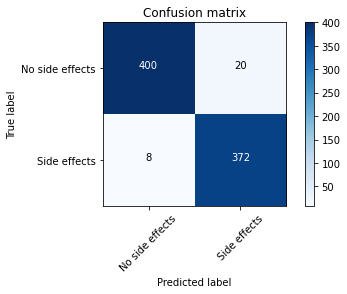

In [114]:
cm_plot_labels = ["No side effects", "Side effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

## Saving the model

In [ ]:
import os

In [120]:
def save_model(model, filename, dir):
    file_loc = os.path.join(dir, filename)
    if not os.path.isfile(file_loc):
        model.save(file_loc)

In [122]:
model_dir = os.path.abspath(os.path.join("..", "models"))
filename = "medical_model.h5"

In [121]:
save_model(model, filename, model_dir)